# EDA

In [44]:
import pandas as pd
import numpy as np

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
df = pd.read_csv('/content/drive/MyDrive/dataset/garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [47]:
df.shape

(1197, 15)

In [48]:
df.describe

<bound method NDFrame.describe of            date   quarter  department        day  team  targeted_productivity  \
0      1/1/2015  Quarter1      sweing   Thursday     8                   0.80   
1      1/1/2015  Quarter1  finishing    Thursday     1                   0.75   
2      1/1/2015  Quarter1      sweing   Thursday    11                   0.80   
3      1/1/2015  Quarter1      sweing   Thursday    12                   0.80   
4      1/1/2015  Quarter1      sweing   Thursday     6                   0.80   
...         ...       ...         ...        ...   ...                    ...   
1192  3/11/2015  Quarter2   finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2   finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2   finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2   finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2   finishing  Wednesday     6                   0.

In [49]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

# Data Visualisation

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt


<ipython-input-51-82c8bf47d0ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap = 'Blues')


<Axes: >

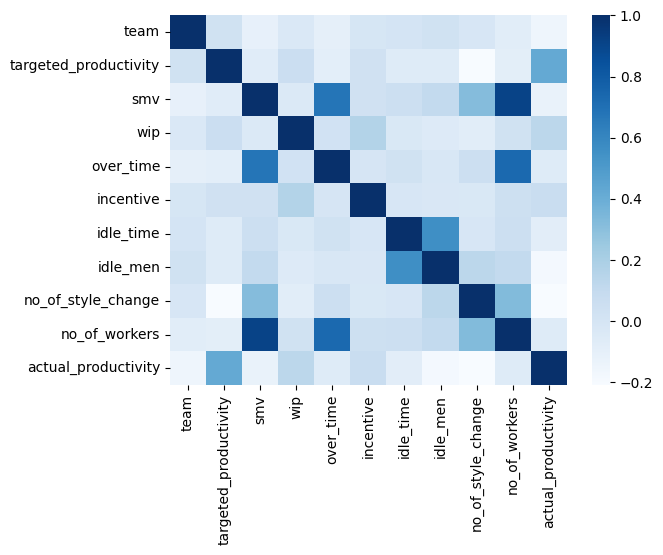

In [51]:
sns.heatmap(df.corr(),cmap = 'Blues')

<Axes: xlabel='department', ylabel='incentive'>

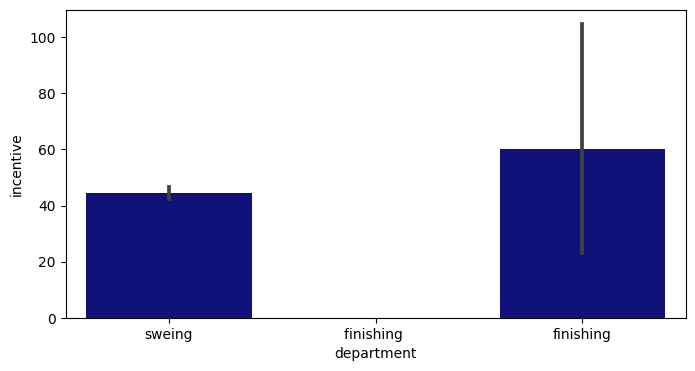

In [52]:
plt.figure(figsize = (8,4))
sns.barplot(data = df ,y = 'incentive', x = 'department', color = 'darkblue')

Text(0.5, 1.0, 'Box Plot')

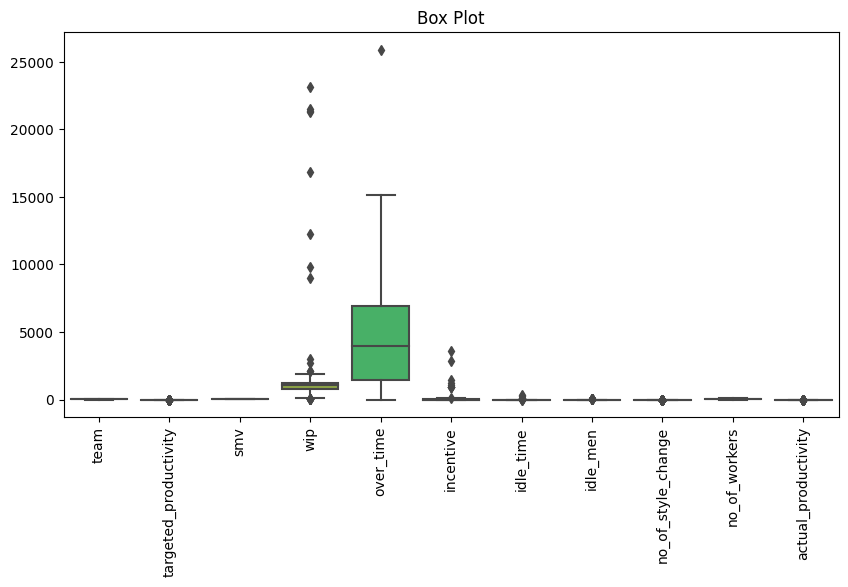

In [53]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df)
plt.xticks(rotation = 90)
plt.title("Box Plot")

<Axes: xlabel='department', ylabel='count'>

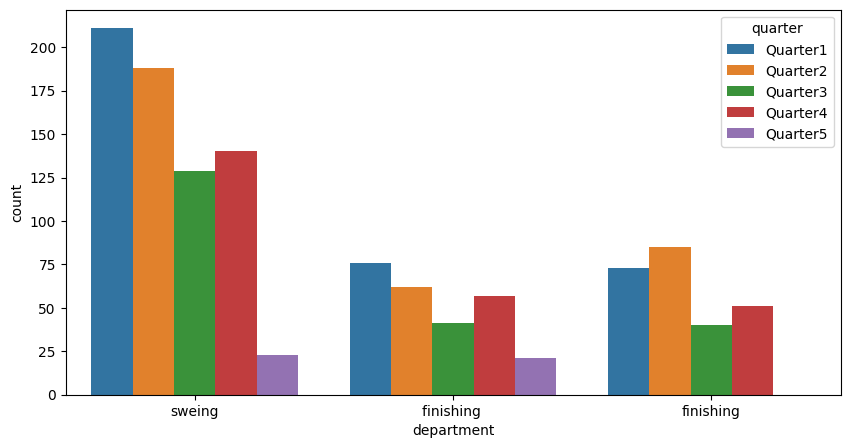

In [54]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'department', hue = 'quarter', data = df)

<Axes: ylabel='department'>

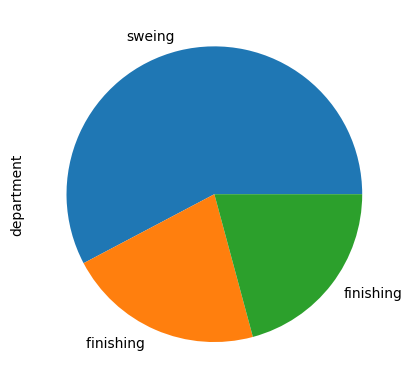

In [55]:
df['department'].value_counts().plot.pie()


# Machine Learning Models

In [56]:
df.drop(['date'],axis = 1,inplace = True)

Performing Label Encoding

In [57]:
from sklearn import preprocessing

In [58]:
label_encoder = preprocessing.LabelEncoder()
for column in df.columns:
  df[column] = label_encoder.fit_transform(df[column])
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,2,3,7,8,41,327,101,37,0,0,0,57,798
1,0,1,3,0,7,2,548,9,0,0,0,0,5,715
2,0,2,3,10,8,9,246,44,20,0,0,0,25,586
3,0,2,3,11,8,9,246,44,20,0,0,0,25,586
4,0,2,3,5,8,40,366,20,20,0,0,0,51,567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,5,9,7,0,548,9,0,0,0,0,5,245
1193,1,0,5,7,6,1,548,9,0,0,0,0,5,241
1194,1,0,5,6,5,1,548,9,0,0,0,0,5,241
1195,1,0,5,8,7,0,548,19,0,0,0,0,11,141


Importing Libraries

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score,precision_score, recall_score,f1_score

In [60]:
x = df.drop('no_of_style_change',axis = 1)
y = df['no_of_style_change']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

**1.Random Forest Classifier**

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [62]:
rfc = RandomForestClassifier(n_estimators=600)

In [63]:
model = rfc.fit(x_train,y_train)
y_pred_lreg = rfc.predict(x_test)
rfc_logreg_accuracy = accuracy_score(y_test,y_pred_lreg)
print('Accuracy',rfc_logreg_accuracy)

Accuracy 0.9791666666666666


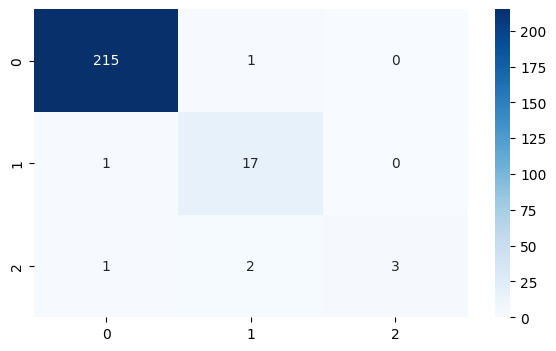

In [64]:
predictions = rfc.predict(x_test)
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize = (7,4))
headmap = sns.heatmap(cf_matrix, annot = True, cmap = 'Blues', fmt = 'g',

                      xticklabels = np.unique(true_labels),
                      yticklabels = np.unique(true_labels))

**2. Decision Tree Classifier**

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
model = DecisionTreeClassifier(random_state=10)
model = model.fit(x_train,y_train)
y_pred_lreg = rfc.predict(x_test)
logreg_accuracy = accuracy_score(y_test,y_pred_lreg)
print('Accuracy',logreg_accuracy)


Accuracy 0.9791666666666666


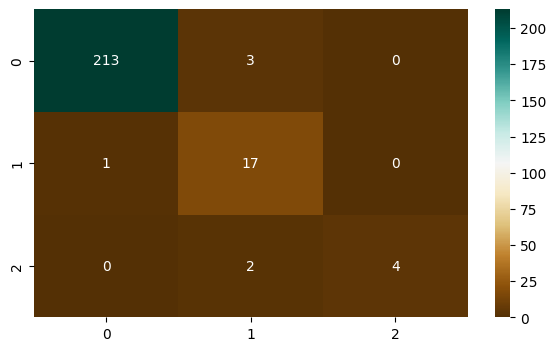

In [67]:
predictions = model.predict(x_test)
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize = (7,4))
headmap = sns.heatmap(cf_matrix, annot = True, cmap = 'BrBG', fmt = 'g',

                      xticklabels = np.unique(true_labels),
                      yticklabels = np.unique(true_labels))

**3. SVM**


In [68]:
from sklearn import svm
classifier = svm.SVC(kernel = 'linear')

In [69]:
classifier.fit(x_train,y_train)
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print("Accuracy of the training data", training_data_accuracy)

Accuracy of the training data 0.896551724137931


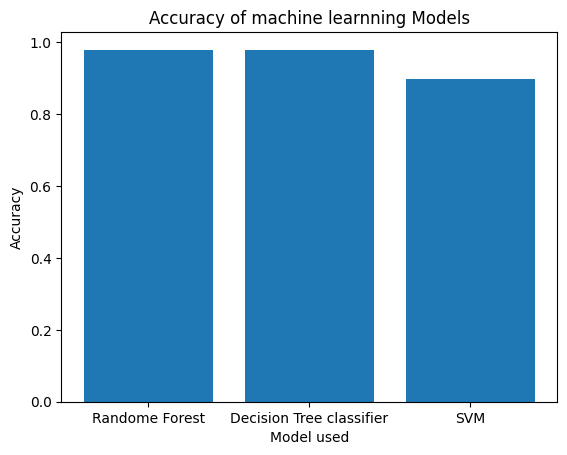

In [70]:
accuracy_values = [rfc_logreg_accuracy,logreg_accuracy,training_data_accuracy ]
model_name = ['Randome Forest', 'Decision Tree classifier' , 'SVM']
plt.bar(model_name, accuracy_values)
plt.xlabel('Model used')
plt.ylabel('Accuracy')
plt.title('Accuracy of machine learnning Models')
plt.show()
